<a href="https://colab.research.google.com/github/Davron030901/PyTorch/blob/main/Build_Your_First_PyTorch_Model_(Linear_Regression).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X=np.array([x for x in range(100)]).reshape(-1,1)
y=46+2*X.flatten()

In [3]:
X

array([[ 0],
       [ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12],
       [13],
       [14],
       [15],
       [16],
       [17],
       [18],
       [19],
       [20],
       [21],
       [22],
       [23],
       [24],
       [25],
       [26],
       [27],
       [28],
       [29],
       [30],
       [31],
       [32],
       [33],
       [34],
       [35],
       [36],
       [37],
       [38],
       [39],
       [40],
       [41],
       [42],
       [43],
       [44],
       [45],
       [46],
       [47],
       [48],
       [49],
       [50],
       [51],
       [52],
       [53],
       [54],
       [55],
       [56],
       [57],
       [58],
       [59],
       [60],
       [61],
       [62],
       [63],
       [64],
       [65],
       [66],
       [67],
       [68],
       [69],
       [70],
       [71],
       [72],
       [73],
       [74],
       [75],
       [76],

In [4]:
y

array([ 46,  48,  50,  52,  54,  56,  58,  60,  62,  64,  66,  68,  70,
        72,  74,  76,  78,  80,  82,  84,  86,  88,  90,  92,  94,  96,
        98, 100, 102, 104, 106, 108, 110, 112, 114, 116, 118, 120, 122,
       124, 126, 128, 130, 132, 134, 136, 138, 140, 142, 144, 146, 148,
       150, 152, 154, 156, 158, 160, 162, 164, 166, 168, 170, 172, 174,
       176, 178, 180, 182, 184, 186, 188, 190, 192, 194, 196, 198, 200,
       202, 204, 206, 208, 210, 212, 214, 216, 218, 220, 222, 224, 226,
       228, 230, 232, 234, 236, 238, 240, 242, 244])

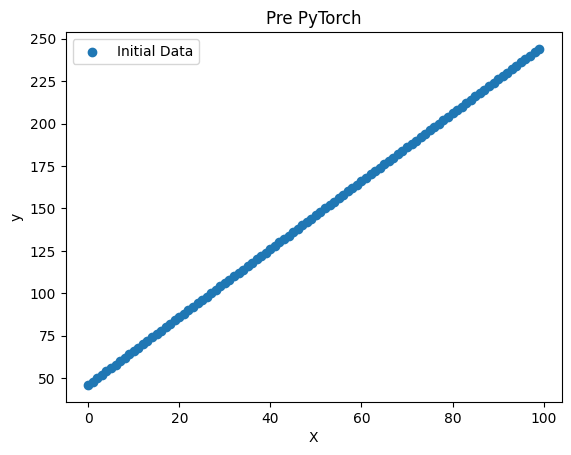

In [23]:
plt.scatter(X,y,label="Initial Data")
plt.title("Pre PyTorch")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

In [7]:
x_mean,x_std=X.mean(),X.std()
X_normalize=(X-x_mean)/x_std
X_tensor=torch.tensor(X_normalize,dtype=torch.float32)

In [8]:
print(X_tensor.shape)

torch.Size([100, 1])


In [9]:
y_mean,y_std=y.mean(),y.std()
y_normalize=(y-y_mean)/y_std
y_tensor=torch.tensor(y_normalize,dtype=torch.float32)

In [10]:
print(y_tensor.shape)

torch.Size([100])


In [11]:
class LinearRegressionModel(nn.Module):
    def __init__(self,input_dim,output_dim):
        super(LinearRegressionModel,self).__init__()
        self.linear=nn.Linear(input_dim,output_dim)

    def forward(self,x):
      return self.linear(x).squeeze(1)

In [12]:
input_dim=1
output_dim=1
model=LinearRegressionModel(input_dim,output_dim)

In [13]:
criterion=nn.MSELoss()
optimizer=optim.SGD(model.parameters(),lr=0.1)

In [18]:
num_epochs=10

In [19]:
for epoch in range(num_epochs):
  # forvard pass
  y_pred=model(X_tensor)
  # calculate loss
  loss=criterion(y_pred,y_tensor)

  # backwardpass and opimization
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  print(f"Epoch {epoch+1}/{num_epochs}, Loss: {loss.item():.5f}")

Epoch 1/10, Loss: 0.00001
Epoch 2/10, Loss: 0.00001
Epoch 3/10, Loss: 0.00000
Epoch 4/10, Loss: 0.00000
Epoch 5/10, Loss: 0.00000
Epoch 6/10, Loss: 0.00000
Epoch 7/10, Loss: 0.00000
Epoch 8/10, Loss: 0.00000
Epoch 9/10, Loss: 0.00000
Epoch 10/10, Loss: 0.00000


In [22]:
new_x=121
new_x_normalized=(new_x-x_mean)/x_std
new_x_tensor=torch.tensor(new_x_normalized,dtype=torch.float32).view(1,-1)
model.eval()
with torch.no_grad():
  predicted_normalized=model(new_x_tensor)
predicted_denormalized=predicted_normalized.item()*y_std+y_mean
print(f"Predicted value for {new_x}: {predicted_denormalized}")

Predicted value for 121: 287.9448930659052


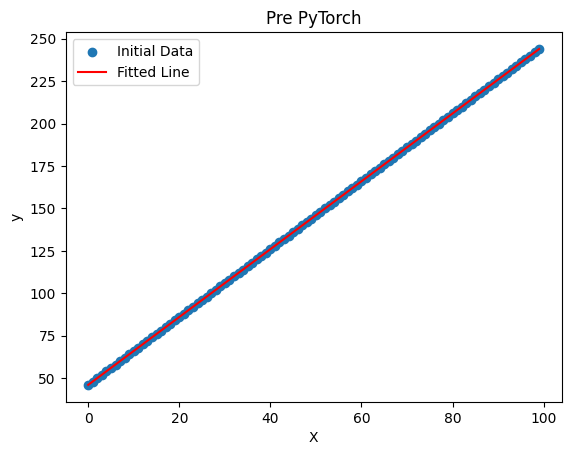

In [24]:
plt.scatter(X,y,label="Initial Data")

fit_line=model(X_tensor).detach().numpy()*y_std+y_mean

plt.plot(X,fit_line,color="red",label="Fitted Line")
plt.title("Pre PyTorch")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()